# Exploratory Data Analysis

In [2]:
import sys
import pandas as pd
from collections import Counter
import ast
sys.path.append('../')
import warnings
warnings.filterwarnings("ignore")
from utils.visualizations import Visualization

# Data

In [3]:
df = pd.read_csv("./Data/clean_desafio_indicium_imdb.csv")
print(f"Shape: {df.shape}")
df.head()

Shape: (999, 15)


,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,The Godfather,1972,All ages,175,"['Crime', 'Drama']",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,Watch with parents,152,"['Action', 'Crime', 'Drama']",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974,All ages,202,"['Crime', 'Drama']",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957,All ages,96,"['Crime', 'Drama']",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003,All ages,201,"['Action', 'Adventure', 'Drama']",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [4]:
visualizer = Visualization(df)

# Univariate Analysis

## Numerical Features

In [5]:
df.describe()

,released_year,runtime,imdb_rating,meta_score,no_of_votes,gross
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02
mean,1991.218218,122.871872,7.947948,78.131131,2.716214e+05,6.053338e+07
std,23.297166,28.101227,0.272290,11.373766,3.209126e+05,1.014694e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,72.000000,5.547150e+04,5.011838e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,2009.000000,137.000000,8.100000,85.500000,3.731675e+05,6.157656e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


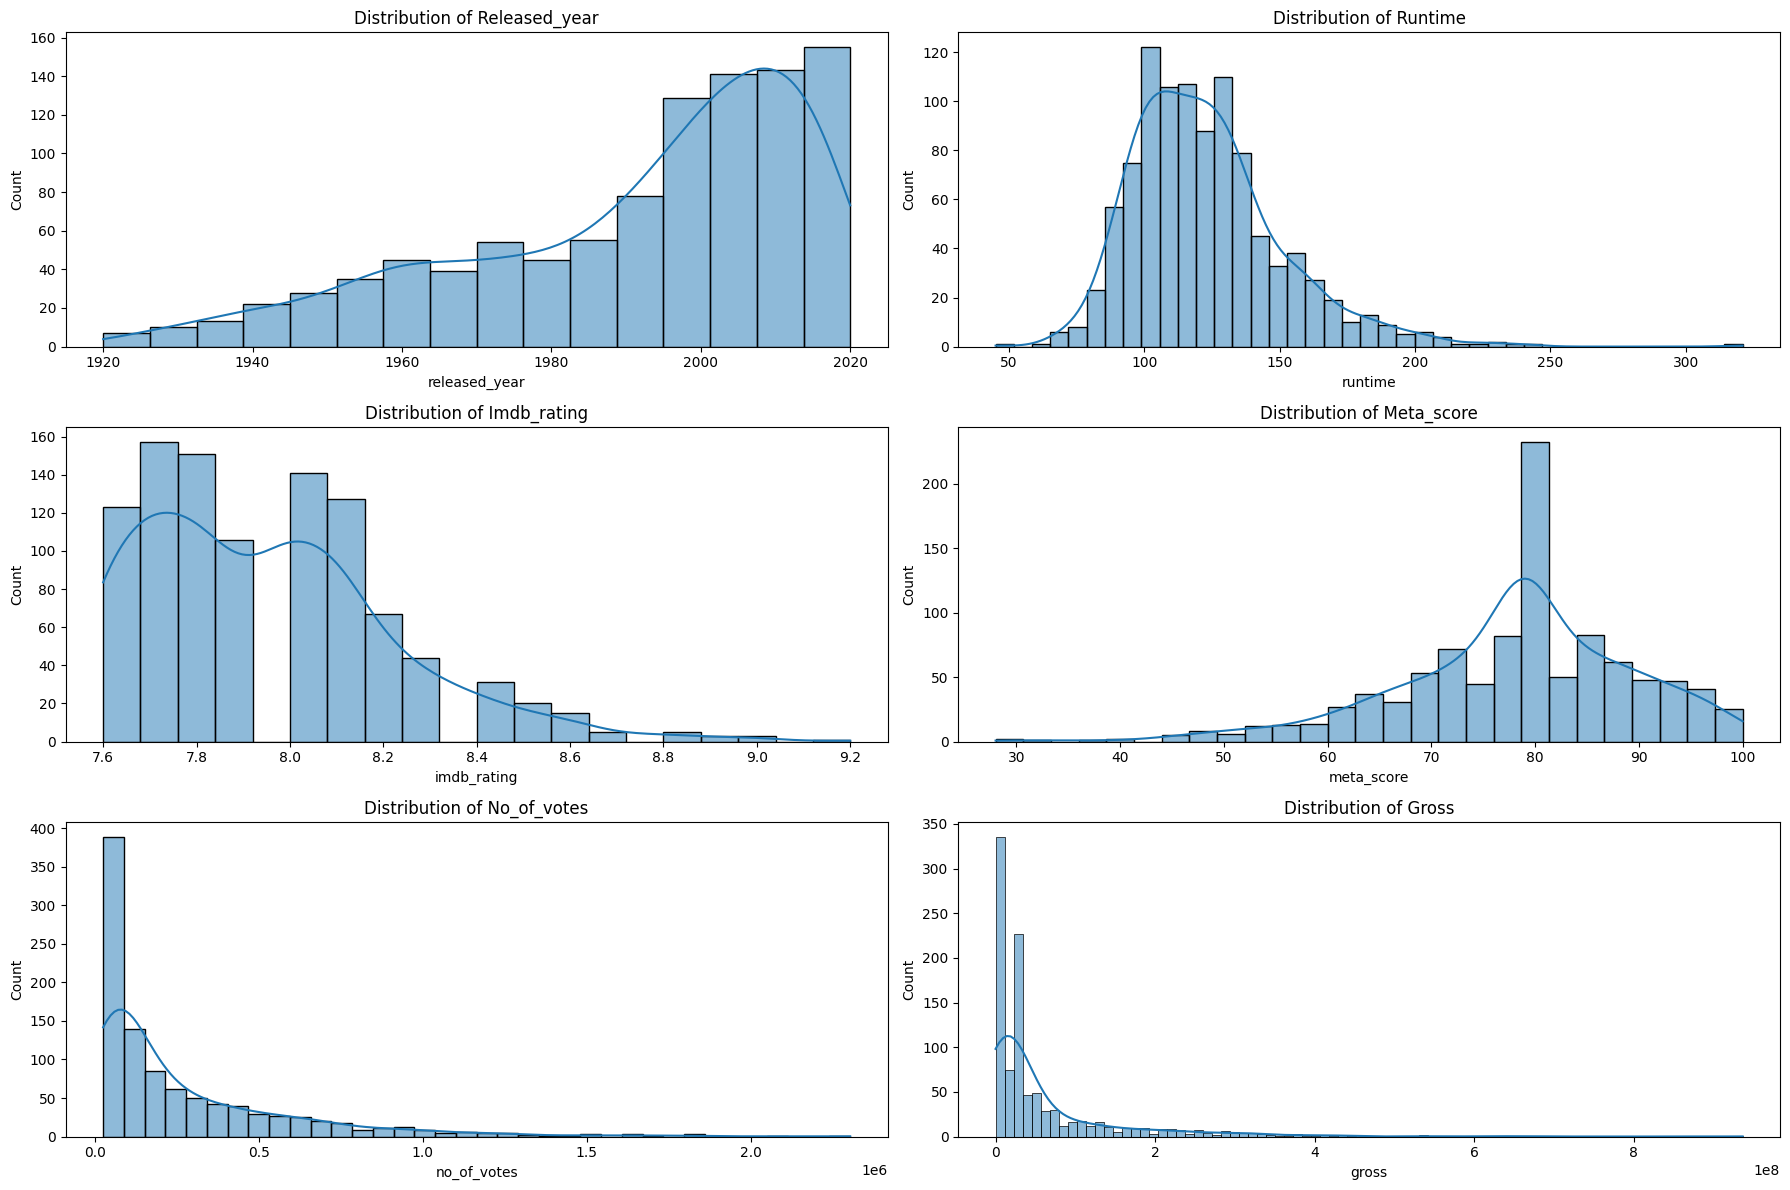

In [6]:
visualizer.numerical_univariate_analysis(3, 2)

### Observations:
- `runtime`, `imdb_rating` and `meta_score` have a distribution similar to a normal one
- `No_of_votes` and `Gross` have a heavily positively skewed distribution, with mode < median < mean
- The values of the columns are on different scales, with some columns ranging from units to hundreds and others being in the millions
### Impact:
- It would be interesting to test some methods to make the distributions of `No_of_votes` and `Gross` more closely resemble a gaussian one
- Scaling the data will be necessary for better results, but the scaler will be chosen after the columns are close to a gaussian distribution and taking into account the outliers

## Categorical Features

In [7]:
for i in df.select_dtypes("object"):
    if i != "genre":
        print(f"Unique {i}: {len(df[i].unique())}")
    else:
        # The column was saved as a string representation of a list, so this convert the values back to lists of strings
        print(f"Unique genres: {len(df['genre'].apply(ast.literal_eval).explode().unique())}")

Unique series_title: 998
Unique certificate: 6
Unique genres: 21
Unique overview: 999
Unique director: 548
Unique star1: 659
Unique star2: 840
Unique star3: 890
Unique star4: 938


### Observations:
- `series_title` and `overview` are all different
- Despite `genre` being lists of genres, there are 21 unique genres in total
- `director` and all `star` columns have a lot of different people
### Impact:
- `series_title` and `overview` can probably be dropped, but there's still studies that can be done with them
- `director` and all `star` columns can be grouped like `certificate` was, but this time, they can be grouped by times that the person appeared in the dataset

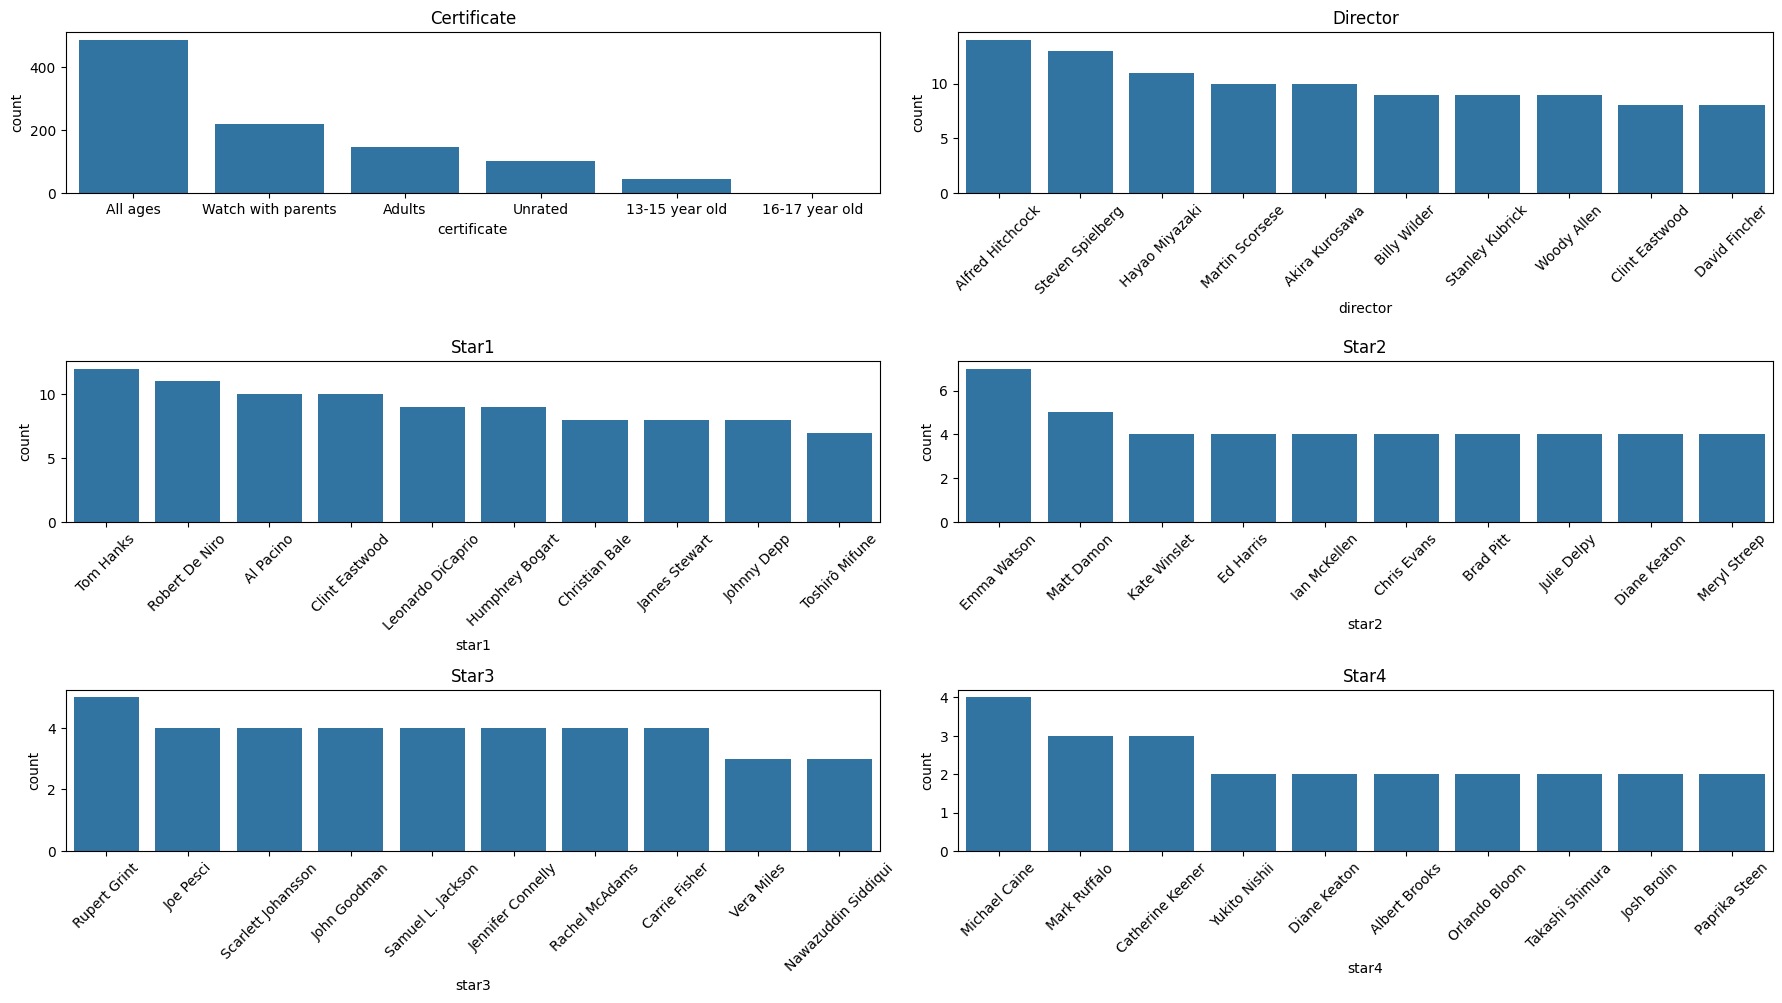

In [8]:
visualizer.categorical_univariate_analysis(["certificate", "director", "star1", "star2", "star3", "star4"], 4, 2)

In [9]:
df_genre= df["genre"].apply(ast.literal_eval).copy()
df_genre= pd.DataFrame([genre for sublist in df_genre for genre in sublist])
df_genre["genre_values"] = df_genre.copy()
df_genre = df_genre.drop(columns=0)

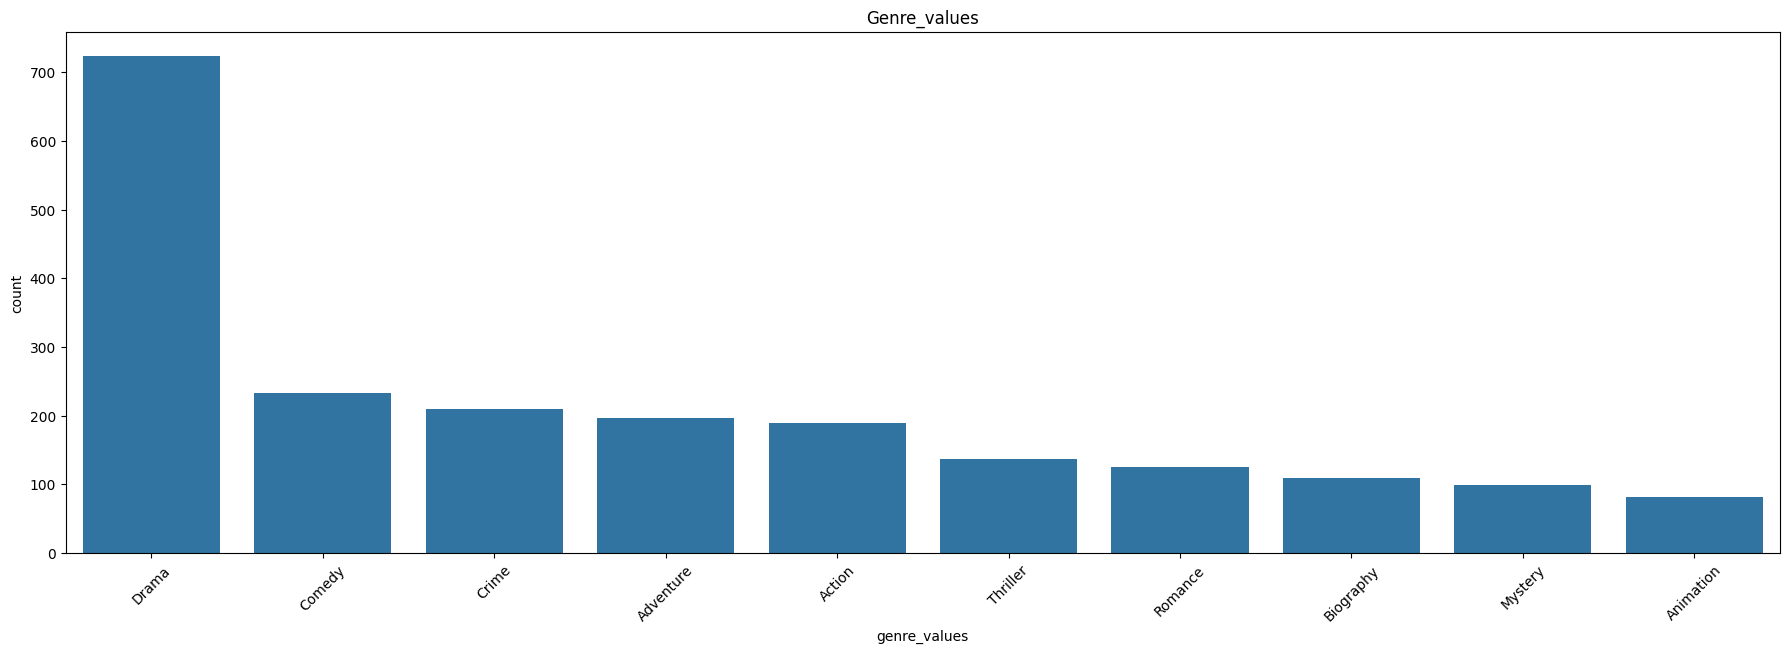

In [10]:
visualizer_genre = Visualization(df_genre)
visualizer_genre.categorical_univariate_analysis(["genre_values"], 2, 1)

In [11]:
def get_top_values(column, n=10):
    return set(df[column].value_counts().head(n).index)
top_values_col1 = get_top_values("star1")
top_values_col2 = get_top_values("star2")
top_values_col3 = get_top_values("star3")
top_values_col4 = get_top_values("star4")

top_values_col1 & top_values_col2 & top_values_col3 & top_values_col4


set()

### Observations:
- Since the column `director` and all `star` ones have an extreme amount of values, only the top 10 were plotted
- `certificate` shows that almost half of the movies are rated for the general public, with no age restriction
- Drama is by far the most watched genre, appearing almost three times more than the second place
- There's no actor in the same top 10 of all `star` columns

# Features x Target

## Numerical Features

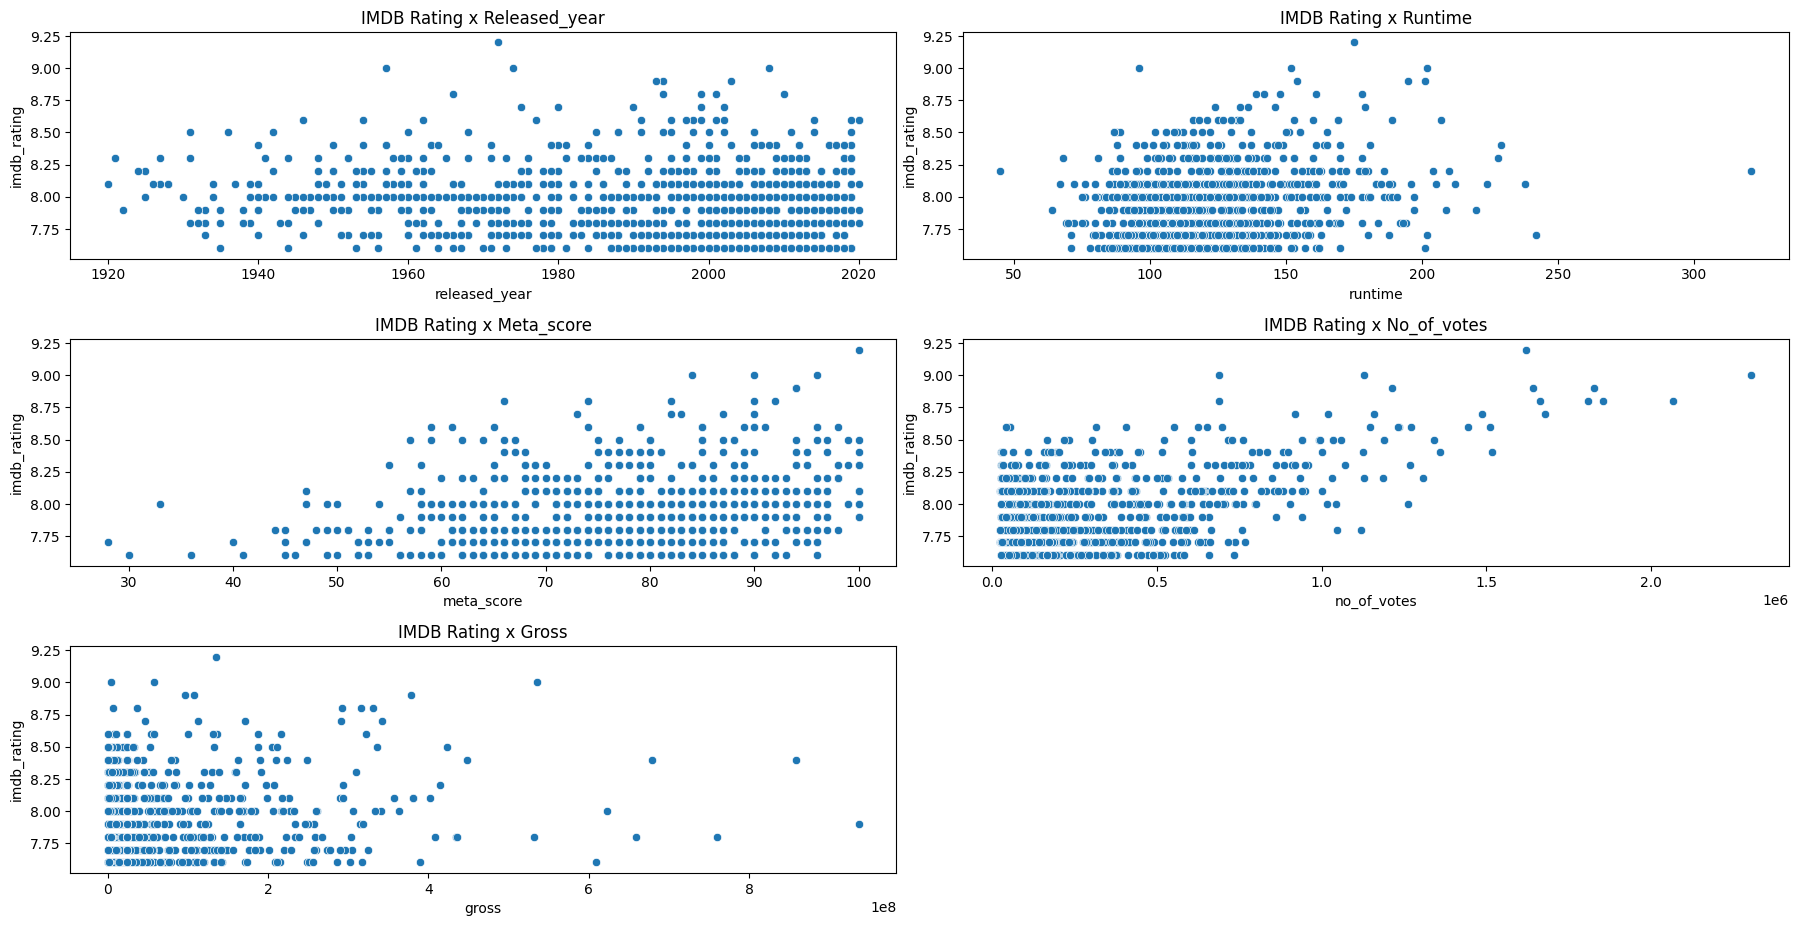

In [12]:
visualizer.num_features_vs_target(4, 2, "imdb_rating")

### Observations:
- `released_year` shows that there's no connection to the target, with no clear correlation pattern visible
- `runtime` shows similar behavior to `released_year`
- `meta_score` shows a positive non-linear correlation to the target. When the meta score is in an extreme, the target score is also there. But if the meta score is in the middle, the target score can vary
- `No_of_votes` show a positive correlation to the target after the 0.5 mark, where a lot of people seem to have the same opinion of the movie. Before that, it shows a negative non-linear correlation, where there is a smaller amount of votes, so this could be movies that are not well known and the majority of votes are from critics, who are usually harsh
- `gross` shows a negative non-linear correlation with the target, proving that to have a good score, an extremely high budget is not always the best thing

## Categorical Features

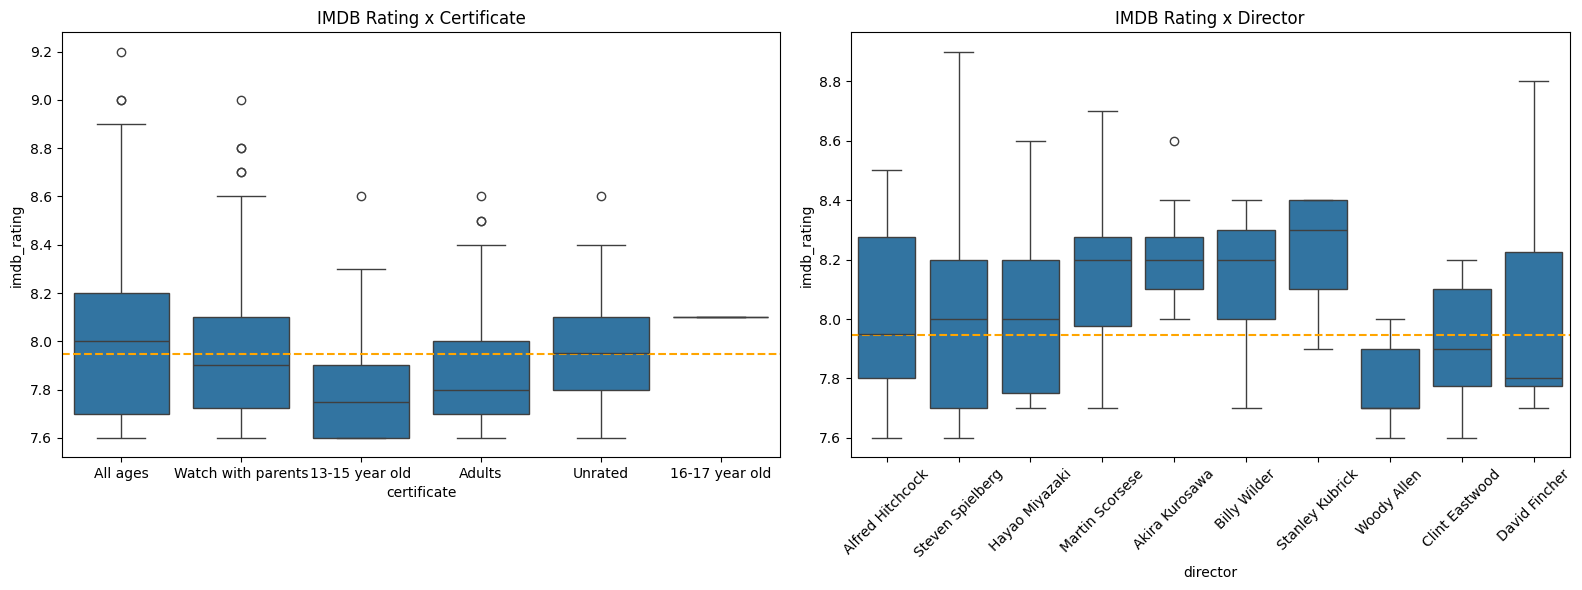

In [11]:
visualizer.cat_features_vs_target(1, 2, "imdb_rating", ["certificate", "director"], figsize=(16, 6))

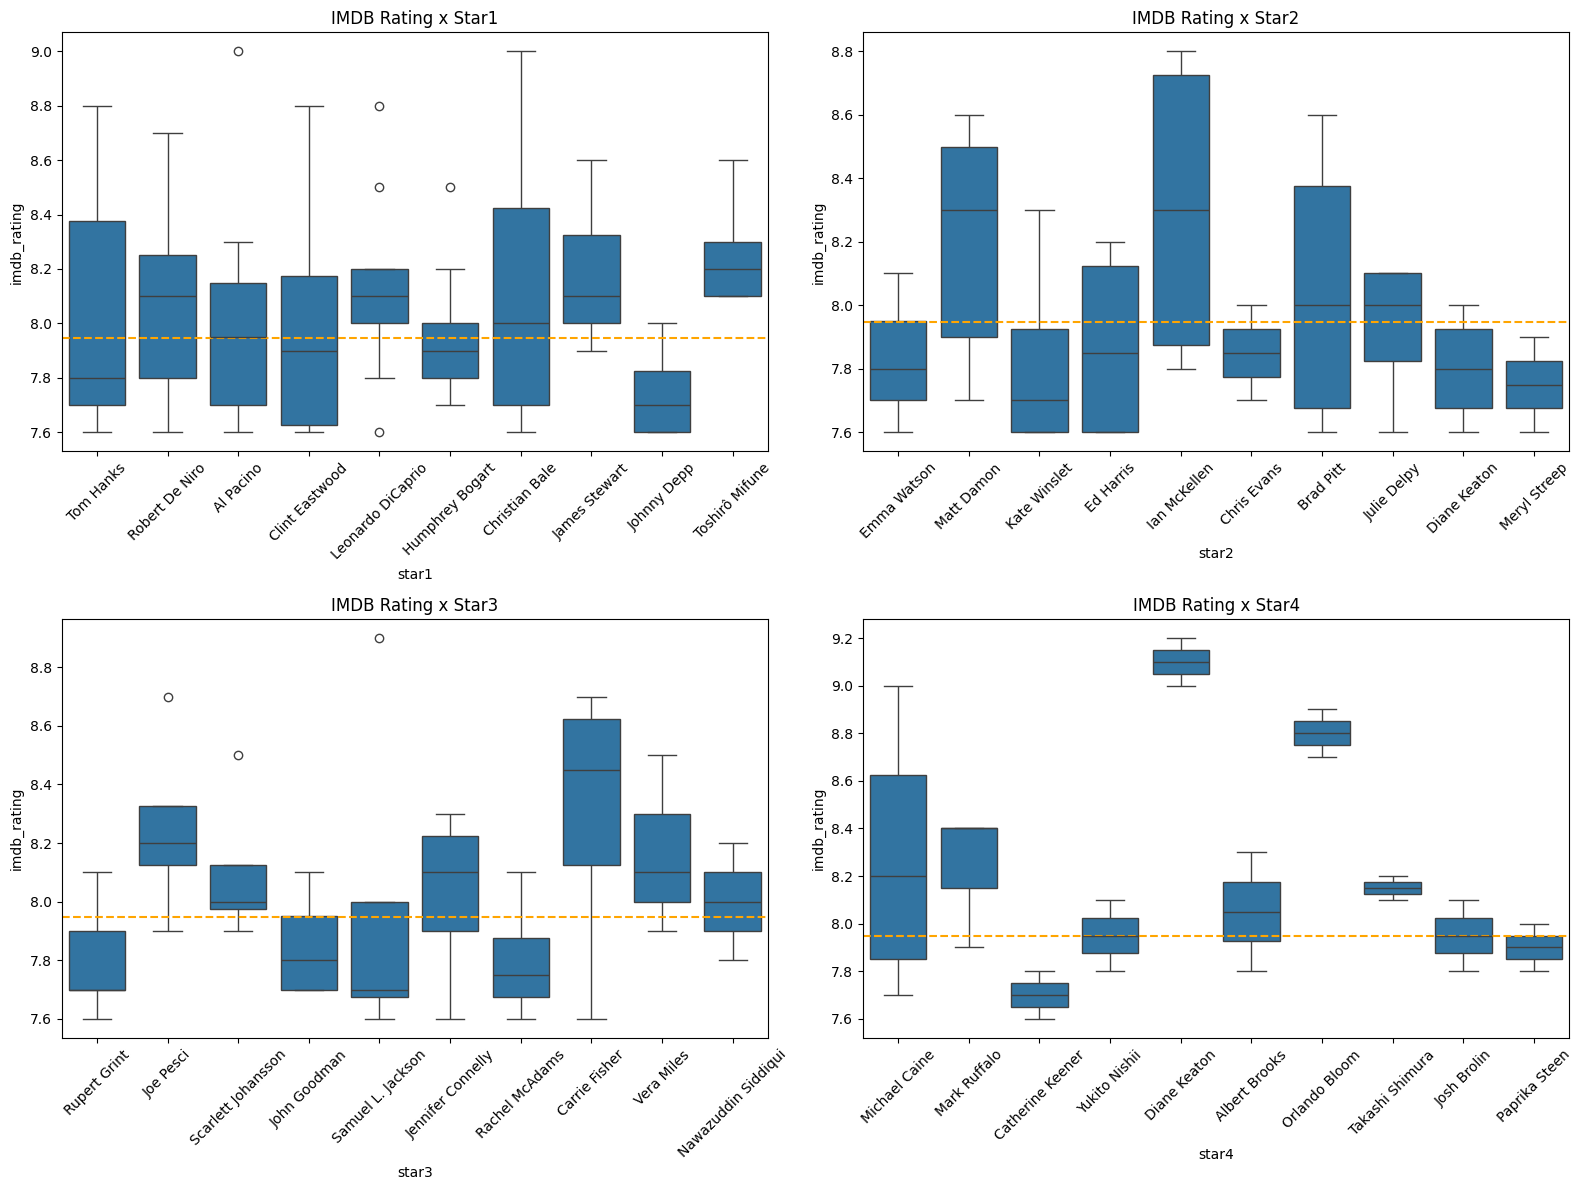

In [12]:
visualizer.cat_features_vs_target(2, 2, "imdb_rating", ["star1", "star2", "star3", "star4"], figsize=(16, 12))

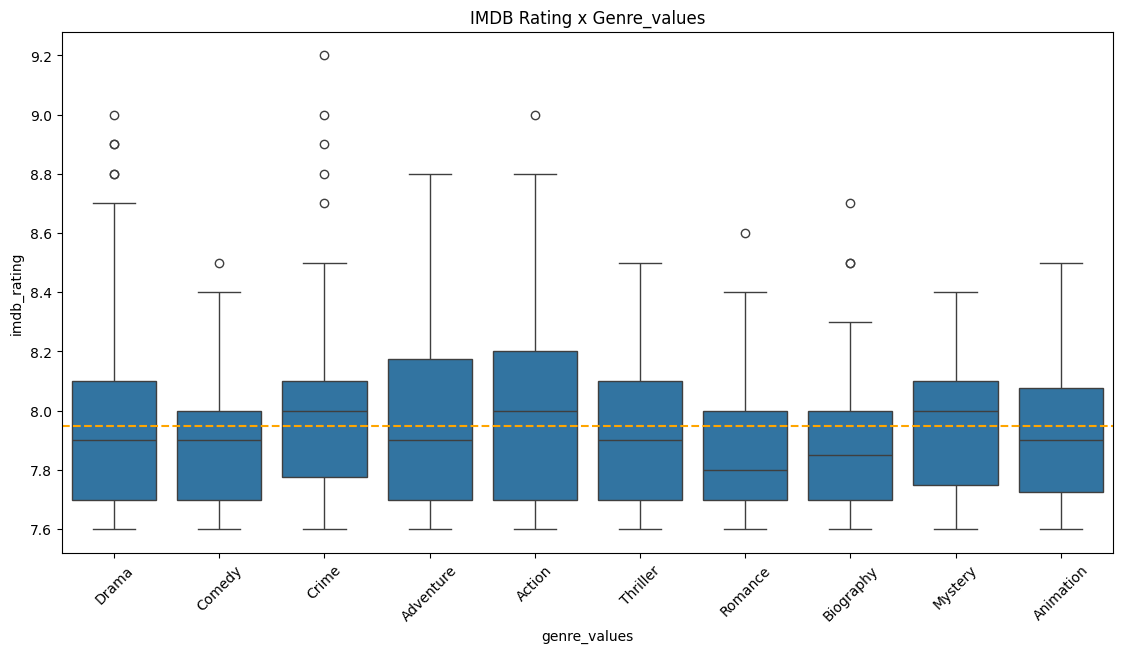

In [13]:
df_genre["imdb_rating"] = df["imdb_rating"]
visualizer_genre.cat_features_vs_target(2, 2, "imdb_rating", ["genre_values"], figsize=(22, 12))

### Observations:
- `certificate` shows that movies with the general rating and those that are unrated are the ones with a median rating above the rating average, with movies that are rated for 13-15 year olds and for adults are way below the average
- `director` shows an interesting behavior, where the directors with the most appearances are well above the mean rating, meaning that grouping directors by how many times they appear in the dataset might be a good idea
- The `star` columns are interesting. `star3` shows that actors that appeared the most tend to have a mix of ratings, with the ones from the top 7 and below the ones with a higher rating than the average. The rest of the `star` columns don't seem to show a great relation with the rating, where an actor can be very famous and appear various times, but the movies may vary from very good to very bad
- Crime, action, and mystery are the only genres in the top 10 that have a rating above average. Drama, which is the most viewed genre by a factor of 3 times, does have movies with high ratings, but the median score is below the mean

# Multivariable Analysis